# K-Means Clustering dengan Scikit-Learn

In [78]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [63]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Masukan Data

In [79]:
# Read dan test files into train and test Pandas dataframes
kepuasan = pd.read_csv('/content/gdrive/MyDrive/kepuasan.csv')

In [65]:
print("***** Tabel *****")
print(kepuasan)

***** Tabel *****
                       Timestamp          NPM  Q1  Q2  Q3  ...  Q6  Q7  Q8  Q9  Q10
0    2020/11/30 8:06:49 AM GMT+7  18081010128   3   2   3  ...   3   3   2   1    2
1    2020/12/08 3:12:43 PM GMT+7  18081010067   4   3   5  ...   3   5   3   5    3
2    2020/12/08 3:15:59 PM GMT+7  18081010059   3   3   3  ...   3   3   3   3    3
3    2020/12/08 3:20:36 PM GMT+7  18081010113   4   3   2  ...   4   4   4   5    3
4    2020/12/08 3:38:11 PM GMT+7  18081010132   4   3   4  ...   4   5   4   4    4
5    2020/12/08 3:39:48 PM GMT+7  17081010075   4   4   5  ...   3   4   3   4    3
6    2020/12/08 3:40:45 PM GMT+7  17081010098   2   2   3  ...   3   3   3   3    2
7    2020/12/08 3:41:28 PM GMT+7  17081010102   4   2   3  ...   3   4   3   1    1
8    2020/12/08 3:47:52 PM GMT+7  18081010077   4   3   4  ...   3   3   3   4    3
9    2020/12/08 8:12:16 PM GMT+7  19081010003   3   3   3  ...   3   3   3   3    3
10   2020/12/09 6:54:17 PM GMT+7  18081010092   4   4   3 

In [80]:
kepuasan = kepuasan[['NPM','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]
kepuasan.head(38)

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,18081010128,3,2,3,3,2,3,3,2,1,2
1,18081010067,4,3,5,5,3,3,5,3,5,3
2,18081010059,3,3,3,3,3,3,3,3,3,3
3,18081010113,4,3,2,4,3,4,4,4,5,3
4,18081010132,4,3,4,4,4,4,5,4,4,4
5,17081010075,4,4,5,3,3,3,4,3,4,3
6,17081010098,2,2,3,3,2,3,3,3,3,2
7,17081010102,4,2,3,2,3,3,4,3,1,1
8,18081010077,4,3,4,4,3,3,3,3,4,3
9,19081010003,3,3,3,3,3,3,3,3,3,3


In [81]:
#nilai data
kepuasan[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']].describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.621622,3.054054,3.864865,3.675676,3.351351,3.567568,3.891892,3.432432,3.594595,2.972973
std,0.720777,0.848068,0.947575,0.914514,0.753371,0.688821,0.737254,0.765236,1.117026,0.985633
min,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
50%,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Preprocessing Data

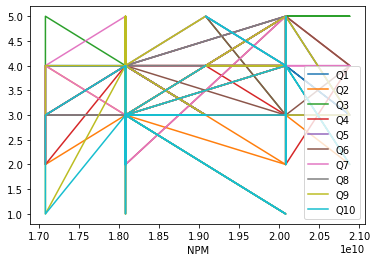

In [82]:
# visualisasi data
data = ["Q1", "Q2", "Q3", "Q4", "Q5", "Q6", "Q7", "Q8", "Q9", "Q10"]
kepuasan.plot(x="NPM", y=data)
plt.show()


# Clustering dengan K-Means

In [90]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(kepuasan[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']])
y_predicted

array([0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2], dtype=int32)

In [91]:
kepuasan['cluster']=y_predicted
kepuasan.head(38)

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,cluster
0,18081010128,3,2,3,3,2,3,3,2,1,2,0
1,18081010067,4,3,5,5,3,3,5,3,5,3,2
2,18081010059,3,3,3,3,3,3,3,3,3,3,0
3,18081010113,4,3,2,4,3,4,4,4,5,3,2
4,18081010132,4,3,4,4,4,4,5,4,4,4,2
5,17081010075,4,4,5,3,3,3,4,3,4,3,2
6,17081010098,2,2,3,3,2,3,3,3,3,2,0
7,17081010102,4,2,3,2,3,3,4,3,1,1,0
8,18081010077,4,3,4,4,3,3,3,3,4,3,0
9,19081010003,3,3,3,3,3,3,3,3,3,3,0


In [92]:
km.cluster_centers_

array([[3.33333333, 2.46666667, 3.4       , 3.06666667, 2.73333333,
        3.26666667, 3.33333333, 3.06666667, 3.13333333, 2.4       ],
       [1.        , 2.        , 5.        , 5.        , 4.        ,
        5.        , 5.        , 1.        , 1.        , 1.        ],
       [3.95238095, 3.52380952, 4.14285714, 4.04761905, 3.76190476,
        3.71428571, 4.23809524, 3.80952381, 4.04761905, 3.47619048]])

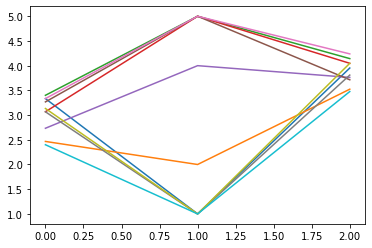

In [93]:
plt.plot(km.cluster_centers_)

In [94]:
#Menstandarkan kembali ukuran variabel array.
scaler = MinMaxScaler()

# scaler.fit(kepuasan[['NPM']])
# kepuasan['NPM'] = scaler.transform(kepuasan[['NPM']])

scaler.fit(kepuasan[['Q1']])
kepuasan['Q1'] = scaler.transform(kepuasan[['Q1']])
scaler.fit(kepuasan[['Q2']])
kepuasan['Q2'] = scaler.transform(kepuasan[['Q2']])
scaler.fit(kepuasan[['Q3']])
kepuasan['Q3'] = scaler.transform(kepuasan[['Q3']])
scaler.fit(kepuasan[['Q4']])
kepuasan['Q4'] = scaler.transform(kepuasan[['Q4']])
scaler.fit(kepuasan[['Q5']])
kepuasan['Q5'] = scaler.transform(kepuasan[['Q5']])
scaler.fit(kepuasan[['Q6']])
kepuasan['Q6'] = scaler.transform(kepuasan[['Q6']])
scaler.fit(kepuasan[['Q7']])
kepuasan['Q7'] = scaler.transform(kepuasan[['Q7']])
scaler.fit(kepuasan[['Q8']])
kepuasan['Q8'] = scaler.transform(kepuasan[['Q8']])
scaler.fit(kepuasan[['Q9']])
kepuasan['Q9'] = scaler.transform(kepuasan[['Q9']])
scaler.fit(kepuasan[['Q10']])
kepuasan['Q10'] = scaler.transform(kepuasan[['Q10']])

kepuasan.head(38)

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,cluster
0,18081010128,0.50,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.25,0.00,0.25,0
1,18081010067,0.75,0.666667,1.000000,1.000000,0.333333,0.333333,1.000000,0.50,1.00,0.50,2
2,18081010059,0.50,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.50,0.50,0.50,0
3,18081010113,0.75,0.666667,0.000000,0.666667,0.333333,0.666667,0.666667,0.75,1.00,0.50,2
4,18081010132,0.75,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.75,0.75,0.75,2
5,17081010075,0.75,1.000000,1.000000,0.333333,0.333333,0.333333,0.666667,0.50,0.75,0.50,2
6,17081010098,0.25,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.50,0.50,0.25,0
7,17081010102,0.75,0.333333,0.333333,0.000000,0.333333,0.333333,0.666667,0.50,0.00,0.00,0
8,18081010077,0.75,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.50,0.75,0.50,0
9,19081010003,0.50,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.50,0.50,0.50,0


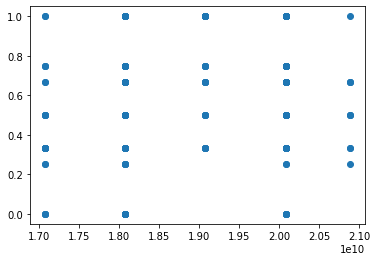

In [100]:
kepuasan_scat = [kepuasan['Q1'],kepuasan['Q2'],kepuasan['Q3'],kepuasan['Q4'],kepuasan['Q5'],kepuasan['Q6'],
                 kepuasan['Q7'],kepuasan['Q8'],kepuasan['Q9'],kepuasan['Q10'],
]
kepuasan_npm = [[kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],
                [kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],[kepuasan.NPM],]
plt.scatter(kepuasan_npm,kepuasan_scat)

In [102]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(kepuasan[['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']])
y_predicted

array([1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2], dtype=int32)

In [103]:
kepuasan['cluster']=y_predicted
kepuasan.head(38)

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,cluster
0,18081010128,0.50,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.25,0.00,0.25,1
1,18081010067,0.75,0.666667,1.000000,1.000000,0.333333,0.333333,1.000000,0.50,1.00,0.50,2
2,18081010059,0.50,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.50,0.50,0.50,1
3,18081010113,0.75,0.666667,0.000000,0.666667,0.333333,0.666667,0.666667,0.75,1.00,0.50,1
4,18081010132,0.75,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.75,0.75,0.75,2
5,17081010075,0.75,1.000000,1.000000,0.333333,0.333333,0.333333,0.666667,0.50,0.75,0.50,2
6,17081010098,0.25,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.50,0.50,0.25,1
7,17081010102,0.75,0.333333,0.333333,0.000000,0.333333,0.333333,0.666667,0.50,0.00,0.00,1
8,18081010077,0.75,0.666667,0.666667,0.666667,0.333333,0.333333,0.333333,0.50,0.75,0.50,1
9,19081010003,0.50,0.666667,0.333333,0.333333,0.333333,0.333333,0.333333,0.50,0.50,0.50,1


In [104]:
km.cluster_centers_


array([[0.        , 0.33333333, 1.        , 1.        , 0.66666667,
        1.        , 1.        , 0.        , 0.        , 0.        ],
       [0.60294118, 0.50980392, 0.47058824, 0.35294118, 0.25490196,
        0.47058824, 0.47058824, 0.52941176, 0.55882353, 0.38235294],
       [0.73684211, 0.85964912, 0.73684211, 0.71929825, 0.61403509,
        0.54385965, 0.75438596, 0.71052632, 0.76315789, 0.61842105]])

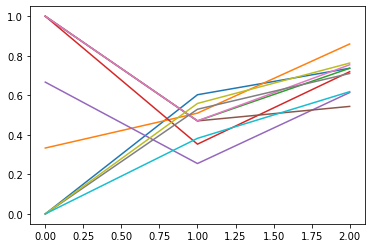

In [110]:
plt.plot(km.cluster_centers_)